___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
# Importing Pandas, Matplotlib Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Avoiding unneccessary warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Reading police.csv file, creating DataFrame named weather
weather = pd.read_csv('weather.csv')

# Displaying first five rows
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Checking weather DataFrame shape
weather.shape

(8022, 26)

In [3]:
# Calculating summary statistics of TMIN, TAVG and TMAX columns
weather[['TMIN','TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


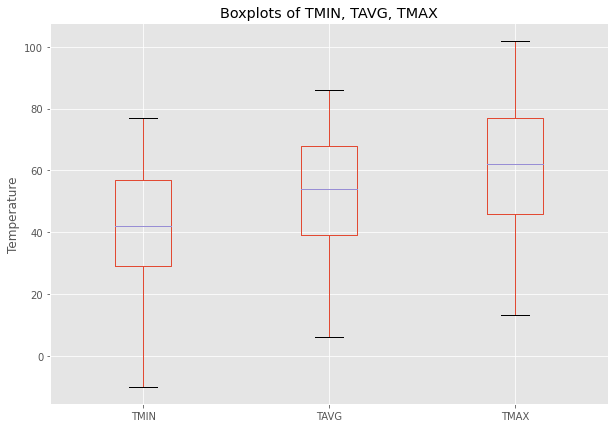

In [4]:
# Creating boxplots of TMIN, TAVG and TMAX
fig=plt.figure(figsize=(10,7))
weather[['TMIN','TAVG','TMAX']].boxplot()
plt.title('Boxplots of TMIN, TAVG, TMAX')
plt.ylabel('Temperature')
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [5]:
# Creating a new column named TDIFF with subtraction of TMIN from TMAX
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [6]:
# Calculating summary statistics of TDIFF column
weather[['TDIFF']].describe()

,TDIFF
count,7994.000000
mean,19.149237
std,7.009716
min,-25.000000
25%,14.000000
50%,19.000000
75%,24.000000
max,48.000000


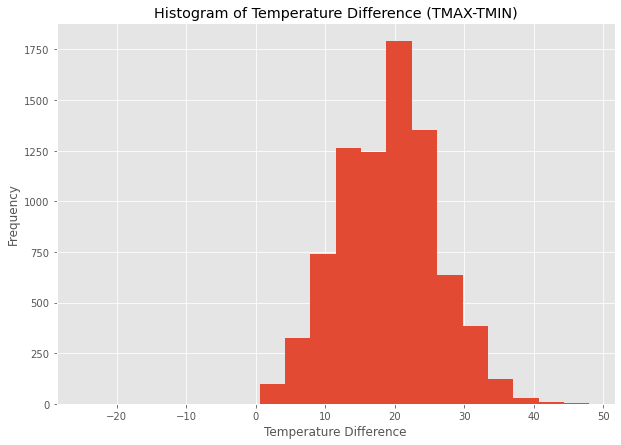

In [7]:
# Creating a histogram of TDIFF column in 20 bins
fig = plt.figure(figsize=(10,7))
weather['TDIFF'].hist(grid=True, bins=20)
plt.title('Histogram of Temperature Difference (TMAX-TMIN)')
plt.xlabel('Temperature Difference')
plt.ylabel('Frequency')
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [8]:
# Creating a list of column names from WT01 to WT22
WT_column_list = weather.columns[6:26]

# Creating a DataFrame named WT from the columns of WT01 to WT22
WT = weather[WT_column_list]

# Displaying the first five rows of WT DataFrame
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking data types of columns
WT.dtypes

WT01    float64
WT02    float64
WT03    float64
WT04    float64
WT05    float64
WT06    float64
WT07    float64
WT08    float64
WT09    float64
WT10    float64
WT11    float64
WT13    float64
WT14    float64
WT15    float64
WT16    float64
WT17    float64
WT18    float64
WT19    float64
WT21    float64
WT22    float64
dtype: object

In [10]:
# Summing up all columns to a new bad_conditions column
WT['bad_conditions'] = WT.sum(axis=1)

In [11]:
# Displaying the first five rows of WT DataFrame to check new columns addition
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [12]:
# Checking missing values of each column, including bad_conditions
WT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WT01            1777 non-null   float64
 1   WT02            221 non-null    float64
 2   WT03            227 non-null    float64
 3   WT04            119 non-null    float64
 4   WT05            360 non-null    float64
 5   WT06            25 non-null     float64
 6   WT07            79 non-null     float64
 7   WT08            404 non-null    float64
 8   WT09            69 non-null     float64
 9   WT10            2 non-null      float64
 10  WT11            3 non-null      float64
 11  WT13            1175 non-null   float64
 12  WT14            575 non-null    float64
 13  WT15            6 non-null      float64
 14  WT16            1326 non-null   float64
 15  WT17            12 non-null     float64
 16  WT18            345 non-null    float64
 17  WT19            4 non-null      f

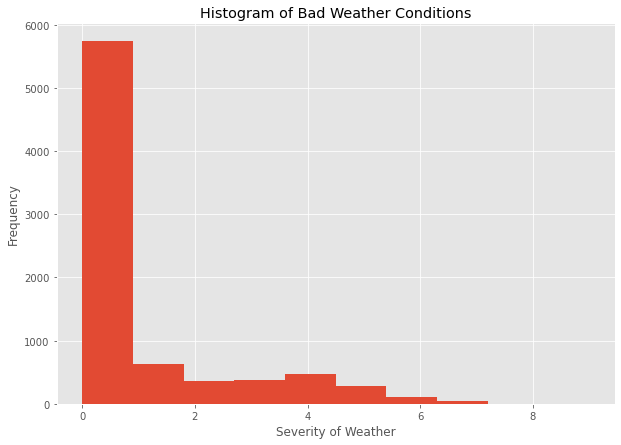

In [13]:
# Creating a histogram of bad_conditions column
fig = plt.figure(figsize=(10,7))
WT['bad_conditions'].hist(grid=True)
plt.title('Histogram of Bad Weather Conditions')
plt.xlabel('Severity of Weather')
plt.ylabel('Frequency')
plt.show()

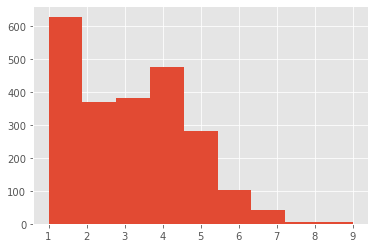

In [14]:
#histogram for WT['bad_conditions']>0 in order to focus on the bad weather
WT2=WT[WT['bad_conditions']>0]
plt.hist(WT2['bad_conditions'], bins=9);

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [15]:
# Counting unique values of bad_conditions column
WT['bad_conditions'].value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [16]:
# Checking data type of bad_conditions column
WT['bad_conditions'].dtype

dtype('float64')

In [17]:
# Creating a dictionary named mapping to classify weather conditions
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [18]:
# Checking the dictionary mapping
mapping

{0: 'good',
 1: 'bad',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 5: 'worse',
 6: 'worse',
 7: 'worse',
 8: 'worse',
 9: 'worse'}

In [19]:
# Creating a new column named 'rating' by mapping bad_conditions column
WT['rating'] = WT['bad_conditions'].map(mapping)

In [20]:
# Checking rating column
WT['rating']

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: object

In [21]:
# Checking data type of rating column
WT['rating'].dtype

dtype('O')

In [22]:
# Counting unique values to confirm mapping applied correctly
WT['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [23]:
# Checking first five rows the WT DataFrame
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [24]:
# Creating a list object named cats
cats = ['good', 'bad', 'worse']

In [25]:
# Creating a Categorical Data Type object
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)

In [26]:
# Changing the data type of rating column from object to category 
WT['rating'] = WT['rating'].astype(cat_dtype)

In [27]:
# Examining the head of the rating column, data type, and category order
WT['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [28]:
# Reading police.csv file, creating DataFrame named ri
ri = pd.read_csv('police.csv.zip', nrows=50000)

# Dropping county_name, county_fips, fine_grained_location,search_type_raw,search_type, states columns from DataFrame
ri.drop(['county_name','county_fips','fine_grained_location','search_type_raw','state'], axis=1, inplace=True)

# Dropping rows that contains missing values of driver_gender column
ri.dropna(subset=['driver_gender'], inplace=True)

# Changing is_arrested column data type from object to bool
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Concatenate stop_date and stop_time
ri['combined'] = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# Converting combined column data format from object to datetime, and storing result in new stop_datetime coolumn
ri['stop_datetime'] = pd.to_datetime(ri['combined'])

# Setting stop_datetime column as index of the DataFrame
# ri.set_index('stop_datetime', inplace=True)

# Dropping stop_time, combined columns
ri.drop(['stop_time', 'combined'], axis=1, inplace=True)

# Examining first five rows of the DataFrame
ri.head()

,id,stop_date,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,False,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [29]:
# Resetting the index of the ri DataFrame
# ri.reset_index(inplace=True)

In [30]:
# Examining first five rows of the DataFrame
ri.head()

,id,stop_date,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,False,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [31]:
# Examining first five rows of the DataFrame weather
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [32]:
# Examining first five rows of the DataFrame WT
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good


In [33]:
# Creating weather_rating DataFrame from DATE column of weather and rating column of WT
weather_rating = pd.concat([weather['DATE'], WT['rating']], axis=1)

In [34]:
# Examining first five rows of the DataFrame weather_rating
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
3Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [35]:
ri.head()

,id,stop_date,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,False,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,False,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [36]:
# Examining the shape of ri
ri.shape

(48010, 21)

In [37]:
ri['stop_date'].dtype

dtype('O')

In [38]:
# Examining first five rows of the DataFrame weather_rating
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [39]:
# Examining the shape of weather_rating
weather_rating.shape

(8022, 2)

In [40]:
weather_rating['DATE'].dtype

dtype('O')

In [41]:
# Merging ri and weather_rating DataFrames
ri_weather = pd.merge(ri, weather_rating, how='left', left_on='stop_date', right_on='DATE')

In [42]:
# Examining first five rows of the DataFrame ri_weather
ri_weather.head()

,id,stop_date,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,DATE,rating
0,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,good
1,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02,bad
2,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,2005-01-02,good
3,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,2005-01-02,bad
4,RI-2005-00004,2005-01-04,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,2005-01-04,good


In [43]:
# Examining the shape of ri_weather
ri_weather.shape

(95877, 23)

In [44]:
# Setting stop_datetime column as index of the DataFrame ri_weather
ri_weather.set_index('stop_datetime', inplace=True)

In [45]:
# Examining first five rows of the DataFrame ri_weather
ri_weather.head()

,id,stop_date,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [46]:
# Checking all column names for following calculations
ri_weather.columns

Index(['id', 'stop_date', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'contraband_found', 'stop_outcome', 'is_arrested', 'stop_duration',
       'out_of_state', 'drugs_related_stop', 'district', 'DATE', 'rating'],
      dtype='object')

In [47]:
# Calculating the overall arrest rate
ri_weather['is_arrested'].value_counts(normalize=True)

False    0.948184
True     0.051816
Name: is_arrested, dtype: float64

In [48]:
# Around 5% of the cases resulted in arrest

In [49]:
# Calculating arrest rate for each of the weather rating
ri_weather.groupby('rating')[['is_arrested']].mean()

,is_arrested
rating,
good,0.051263
bad,0.051462
worse,0.062559


In [50]:
# Arrest rates are almost similar for different weather conditions

In [51]:
# Calculating arrest rate for each of the weather rating and violation type
ri_weather.groupby(['rating', 'violation'])[['is_arrested']].mean()

is_arrested
rating violation                       
good   Equipment               0.121123
       Moving violation        0.114006
       Other                   0.275689
       Registration/plates     0.196108
       Speeding                0.023061
bad    Equipment               0.125000
       Moving violation        0.116299
       Other                   0.283368
       Registration/plates     0.214286
       Speeding                0.021220
worse  Equipment               0.150943
       Moving violation        0.133835
       Other                   0.270833
       Registration/plates     0.166667
       Speeding                0.026168

In [52]:
# Changing the order to examine the results much more easily
ri_weather.groupby(['violation', 'rating'])[['is_arrested']].mean()

is_arrested
violation           rating             
Equipment           good       0.121123
                    bad        0.125000
                    worse      0.150943
Moving violation    good       0.114006
                    bad        0.116299
                    worse      0.133835
Other               good       0.275689
                    bad        0.283368
                    worse      0.270833
Registration/plates good       0.196108
                    bad        0.214286
                    worse      0.166667
Speeding            good       0.023061
                    bad        0.021220
                    worse      0.026168

In [53]:
# Arrest rates are high for Other, Registration and Plates violations for all weather conditions generally. 
# Equipment related arrests are higher in worse weather, whereas Registration related arrests are less in worse weather

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [54]:
# Saving the groupby() output to arrest_rate
arrest_rate = ri_weather.groupby(['rating', 'violation'])['is_arrested'].mean()

In [55]:
# Examining the arrest_rate Series
arrest_rate

rating  violation          
good    Equipment              0.121123
        Moving violation       0.114006
        Other                  0.275689
        Registration/plates    0.196108
        Speeding               0.023061
bad     Equipment              0.125000
        Moving violation       0.116299
        Other                  0.283368
        Registration/plates    0.214286
        Speeding               0.021220
worse   Equipment              0.150943
        Moving violation       0.133835
        Other                  0.270833
        Registration/plates    0.166667
        Speeding               0.026168
Name: is_arrested, dtype: float64

In [56]:
# Examining Moving violation for bad weather conditions using .loc[] accessor
arrest_rate.loc['bad','Moving violation']

0.11629857422421024

In [57]:
# Examining Speeding violation for all weather conditions using .loc[] accessor
arrest_rate.loc[:,'Speeding']

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [58]:
# Examining the arrest_rate Series
arrest_rate

rating  violation          
good    Equipment              0.121123
        Moving violation       0.114006
        Other                  0.275689
        Registration/plates    0.196108
        Speeding               0.023061
bad     Equipment              0.125000
        Moving violation       0.116299
        Other                  0.283368
        Registration/plates    0.214286
        Speeding               0.021220
worse   Equipment              0.150943
        Moving violation       0.133835
        Other                  0.270833
        Registration/plates    0.166667
        Speeding               0.026168
Name: is_arrested, dtype: float64

In [59]:
# Unstacking arrest_rate to reshape it into a DataFrame
arrest_rate_df = arrest_rate.unstack()

In [60]:
# Examining arrest_rate_df 
arrest_rate_df

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [61]:
# Checking index of arrest_rate_df
arrest_rate_df.index

CategoricalIndex(['good', 'bad', 'worse'], categories=['good', 'bad', 'worse'], ordered=True, name='rating', dtype='category')

In [62]:
#Create the exact same DataFrame using a pivot table
ri_weather.pivot_table('is_arrested', index='rating', columns='violation')

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [63]:
# Creating exactly same DataFrame by using pivot_table method
arrest_rate_df.pivot_table(index=arrest_rate_df.index)

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [64]:
# Transposing DataFrame by assigning weather rating order to columns
arrest_rate_df.pivot_table(columns=arrest_rate_df.index)

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
